In [98]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [99]:
df_encoded = pd.read_csv('cleaned_data.csv')
df_normalized = pd.read_csv('normalized_data.csv')
df_standardized = pd.read_csv('standardized_data.csv')

In [100]:
df_standardized.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Depression
0,0.891373,0.740244,1.510523,1.345456,0.893354,-0.693539,-1.421814,-1.182432,-1.042063,0.761634,...,-1.409488,-0.711510,1.002512,-0.003847,-0.996422,-0.704880,0.719349,0.647035,0.955627,1
1,-1.121865,1.116908,-1.424206,-0.826195,-1.194113,1.510565,-1.421814,-0.375754,0.116922,-1.312967,...,-0.703681,0.702086,1.002512,1.408253,-0.996422,-0.704880,1.425312,-0.518447,0.360493,0
2,0.891373,-1.519737,1.082541,-0.102311,-0.425762,1.510565,0.459507,-1.182432,-0.710924,-1.312967,...,-1.409488,1.408884,-0.997494,1.408253,1.003591,0.005885,0.719349,-0.518447,-0.002310,0
3,-1.121865,-1.519737,1.388242,-0.102311,-1.404899,-0.693539,-0.481154,-0.375754,-0.379786,0.761634,...,-0.703681,-1.418308,1.002512,-1.415947,1.003591,1.427416,-1.398539,0.452788,1.271643,1
4,-1.121865,1.493571,-0.629384,0.621573,0.322191,0.041162,-1.421814,-0.375754,1.110337,0.761634,...,-1.409488,-1.418308,1.002512,-0.709897,-0.996422,1.427416,0.719349,0.452788,-1.473204,0


In [101]:
df_standardized.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Depression'],
      dtype='object')

**Logistic Regression:**

encoded data:

Complete LogisticRegression Training Accuracy: 0.8237297248857425
Complete LogisticRegression Test Accuracy: 0.8267025089605735
Confusion Matrix:
 [[1156  599]
 [ 368 3457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1755
           1       0.85      0.90      0.88      3825

    accuracy                           0.83      5580
   macro avg       0.81      0.78      0.79      5580
weighted avg       0.82      0.83      0.82      5580



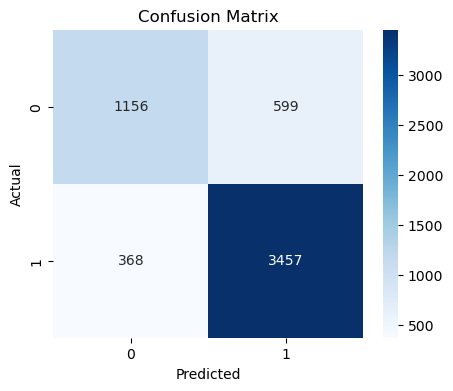

In [102]:
# apply on encoded data
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Complete LogisticRegression Training Accuracy: 0.9413667610190053
Complete LogisticRegression Test Accuracy: 0.9466235341690254
Confusion Matrix:
 [[3070  130]
 [ 134 1612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.93      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



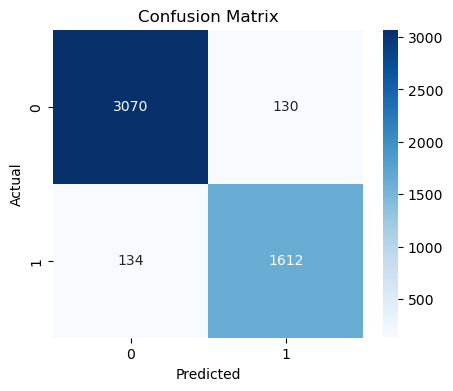

In [103]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [104]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X, y)
print("Best params:", grid.best_params_)

Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Complete LogisticRegression Training Accuracy: 0.9401536595228468
Complete LogisticRegression Test Accuracy: 0.94561261625556
Confusion Matrix:
 [[3069  131]
 [ 138 1608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.92      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



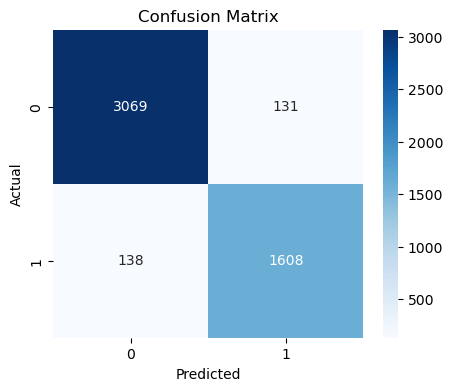

In [105]:
model = LogisticRegression(max_iter=1000, C=grid.best_params_['C'], penalty=grid.best_params_['penalty'], solver=grid.best_params_['solver'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.9458148  0.93974929 0.94419733 0.93752527 0.93813182]
Average score: 0.9410837040032349


standardized data:

Complete LogisticRegression Training Accuracy: 0.8237297248857425
Complete LogisticRegression Test Accuracy: 0.8267025089605735
Confusion Matrix:
 [[1156  599]
 [ 368 3457]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1755
           1       0.85      0.90      0.88      3825

    accuracy                           0.83      5580
   macro avg       0.81      0.78      0.79      5580
weighted avg       0.82      0.83      0.82      5580



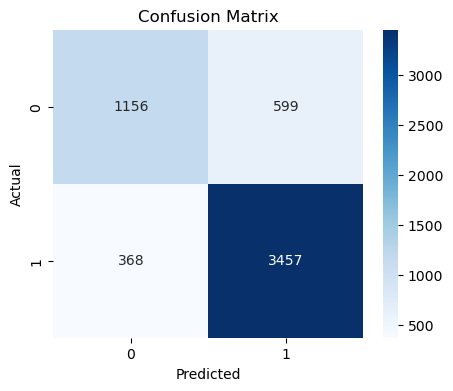

In [107]:
# apply on standardized data
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Complete LogisticRegression Training Accuracy: 0.9413667610190053
Complete LogisticRegression Test Accuracy: 0.9466235341690254
Confusion Matrix:
 [[3070  130]
 [ 134 1612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.93      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



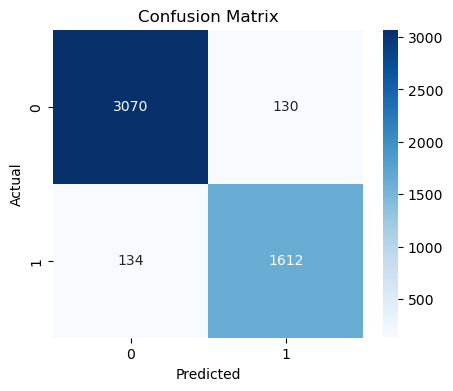

In [108]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [109]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(X, y)
print("Best params:", grid.best_params_)

Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Complete LogisticRegression Training Accuracy: 0.9401536595228468
Complete LogisticRegression Test Accuracy: 0.94561261625556
Confusion Matrix:
 [[3069  131]
 [ 138 1608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3200
           1       0.92      0.92      0.92      1746

    accuracy                           0.95      4946
   macro avg       0.94      0.94      0.94      4946
weighted avg       0.95      0.95      0.95      4946



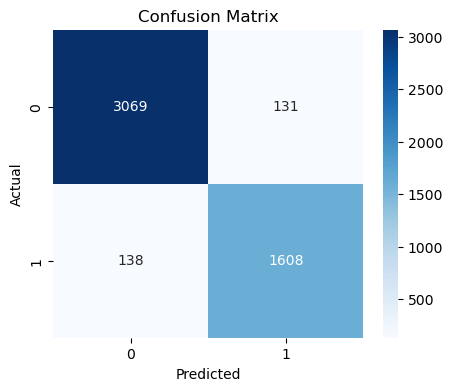

In [110]:
model = LogisticRegression(max_iter=1000, C=grid.best_params_['C'], penalty=grid.best_params_['penalty'], solver=grid.best_params_['solver'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Tr_score = model.score(X_train, y_train)
Tst_score = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Complete LogisticRegression Training Accuracy:", Tr_score)
print("Complete LogisticRegression Test Accuracy:", Tst_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

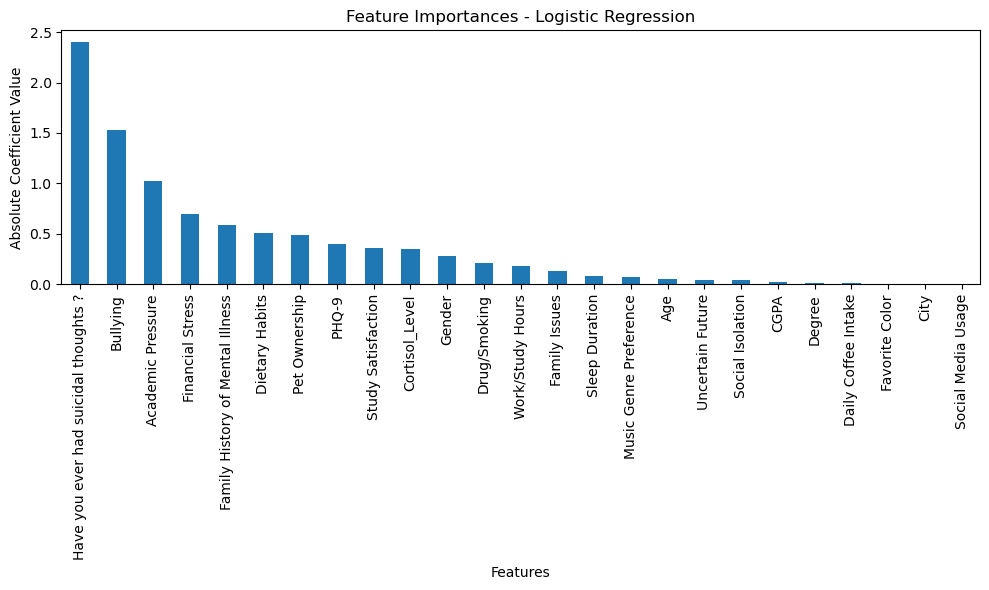

In [111]:
coefficients = model.coef_[0]
features = X_train.columns
importance = pd.Series(np.abs(coefficients), index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importances - Logistic Regression')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [112]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.9458148  0.93974929 0.94419733 0.93752527 0.93813182]
Average score: 0.9410837040032349


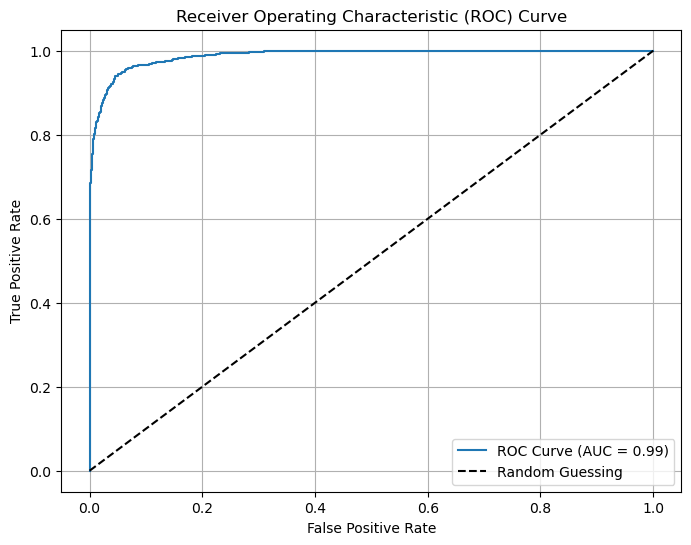

In [113]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest:**

encoded data:

Accuracy: 0.8453405017921147

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1755
           1       0.88      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.84      0.85      0.84      5580


Confusion Matrix:
 [[1303  452]
 [ 411 3414]]


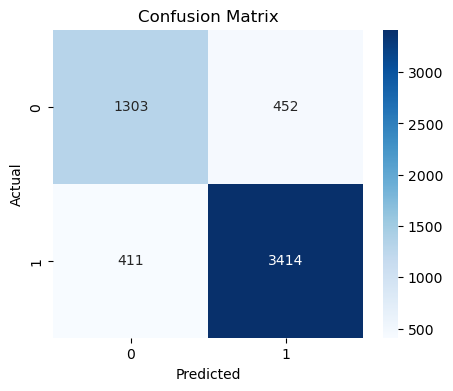

In [114]:
X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy: 0.9720986655883542

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3200
           1       0.97      0.95      0.96      1746

    accuracy                           0.97      4946
   macro avg       0.97      0.97      0.97      4946
weighted avg       0.97      0.97      0.97      4946


Confusion Matrix:
 [[3146   54]
 [  84 1662]]


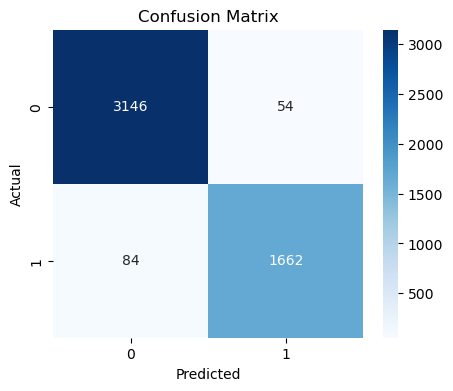

In [115]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [116]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.9458148  0.93974929 0.94419733 0.93752527 0.93813182]
Average score: 0.9410837040032349


standardized data:

Accuracy: 0.8455197132616488

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1755
           1       0.88      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.82      0.82      0.82      5580
weighted avg       0.84      0.85      0.84      5580


Confusion Matrix:
 [[1301  454]
 [ 408 3417]]


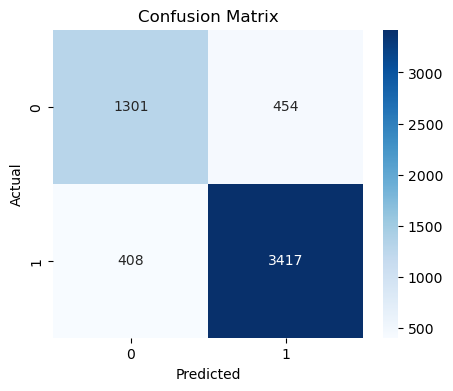

In [117]:
X = df_standardized.drop('Depression', axis=1)
y = df_standardized['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Accuracy: 0.9724439376662866

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3294
           1       0.97      0.95      0.96      1968

    accuracy                           0.97      5262
   macro avg       0.97      0.97      0.97      5262
weighted avg       0.97      0.97      0.97      5262


Confusion Matrix:
 [[3240   54]
 [  91 1877]]


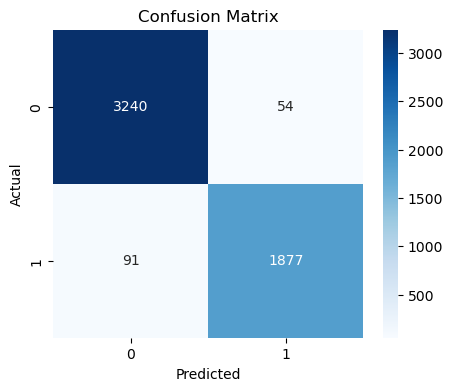

In [118]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

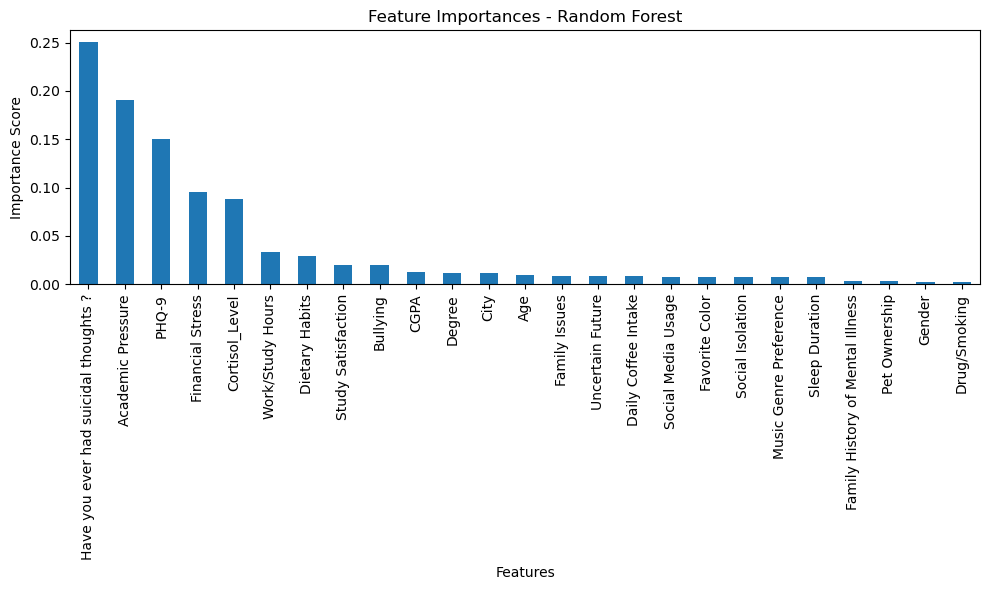

In [119]:
# Get importances
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [120]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.93329532 0.92949449 0.92643984 0.93271241 0.93328265]
Average score: 0.9310449424134667


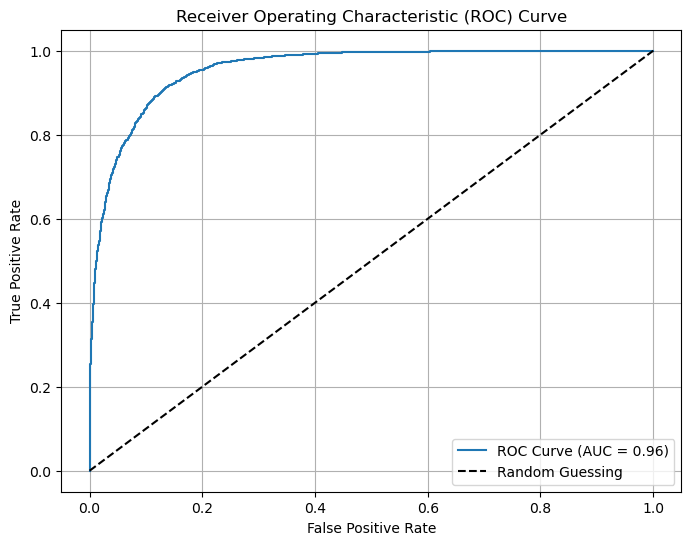

In [121]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

**LightGBM:**

standardized data:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 15426, number of negative: 6892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 22318, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691191 -> initscore=0.805693
[LightGBM] [Info] Start training from score 0.805693
Accuracy: 0.8530465949820788

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1755
           1       0.89      0.89      0.89      3825

    accuracy                           0.85      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.85      0.85      0

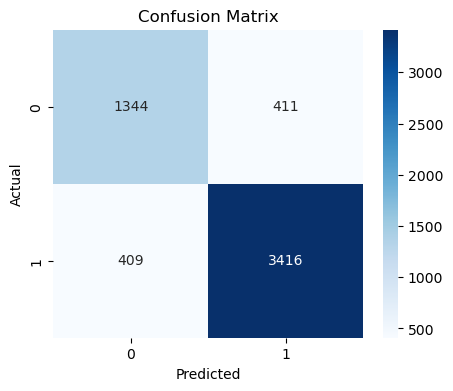

In [122]:
from lightgbm import LGBMClassifier

X = df_standardized.drop(columns=["Depression"])
y = df_standardized["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


c:\Users\eslam\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8038, number of negative: 13007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6373
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381943 -> initscore=-0.481307
[LightGBM] [Info] Start training from score -0.481307
Accuracy: 0.9716837704294945

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3294
           1       0.97      0.96      0.96      1968

    accuracy                           0.97      5262
   macro avg       0.97      0.97      0.97      5262
weighted avg       0.97      0.97      0.97      5262


Confusion Matrix:
 [[3233   61]
 [  88 1880]]

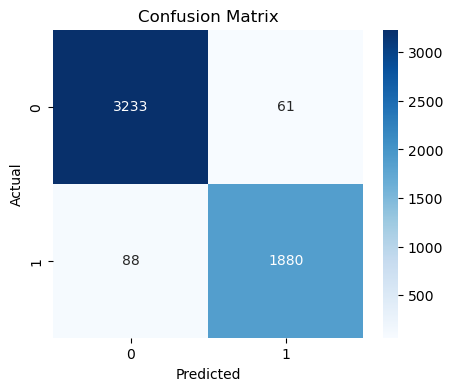

In [123]:
# Balance the dataset
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

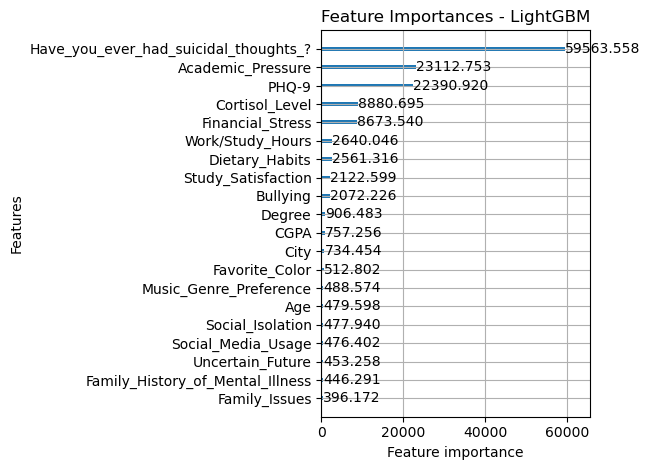

In [124]:
from lightgbm import plot_importance
# Plot using LightGBM's built-in method
plot_importance(model, max_num_features=20, importance_type='gain')  # 'gain' is usually better than 'split'
plt.title('Feature Importances - LightGBM')
plt.tight_layout()
plt.show()

In [125]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_resampled, y_resampled, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8038, number of negative: 13007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6373
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381943 -> initscore=-0.481307
[LightGBM] [Info] Start training from score -0.481307
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7996, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6372
[LightGBM] [Info] Number of data points in the train set: 21045, number of used f

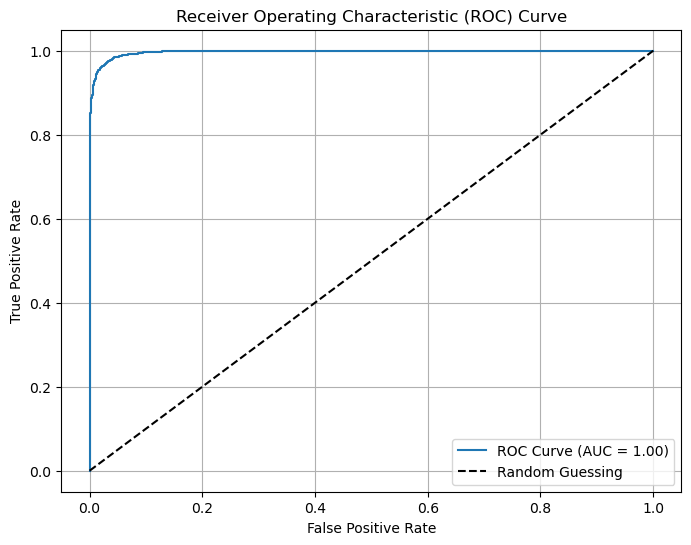

In [126]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()